In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# Step 1: Import the tools we need
from ultralytics import YOLO  # YOLO model
import cv2  # For loading and showing images

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Step 2: Load a pre-trained YOLO model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 19.9MB/s]


In [9]:
# Step 3: Load an image
img = cv2.imread("car-peerson.jpeg")

In [10]:
# Step 4: Run the model on the image
results = model(img)


0: 640x640 1 person, 1 car, 1 train, 340.4ms
Speed: 4.6ms preprocess, 340.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
# Step 5: Filter results to keep only 'car' class (class ID 2 in COCO dataset)
car_class_id = 2
boxes = results[0].boxes
car_boxes = boxes[boxes.cls == car_class_id]

In [12]:
# Step 6: Plot only the 'car' detections
results[0].boxes = car_boxes  # Replace all detections with just car detections
annotated_img = results[0].plot()

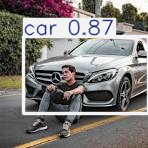

In [13]:
# Step 7: Show the image with only car boxes
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

cv2_imshow(annotated_img)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)  # Wait for any key to close
cv2.destroyAllWindows()